# Load in data inspect some basic information

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read in csv 
df = pd.read_csv('data/df_final_2023_08_25')
# shape 
print("Shape: ", df.shape)

Shape:  (907485, 16)


In [2]:
print("Set the printing size of the pandas df: ")
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Set the printing size of the pandas df: 


In [3]:
print("Deleting the discontious SCC where period_index==-1")
print("Shape: ", df.shape)
df = df[df["period_index"] != -1]
print("Shape: ", df.shape)

Deleting the discontious SCC where period_index==-1
Shape:  (907485, 16)
Shape:  (671868, 16)


In [4]:
print("Shift scc to the first column")
# shift column 'scc' to first position
first_column = df.pop('scc')
# insert column using insert(position,column_name, first_column) function
df.insert(0, 'scc', first_column)

Shift scc to the first column


In [5]:
#print("Acorrding to the trends with DIM, DIM>600 shows abnormal pattern, discard them to obverse the change")
#df = df[df['dim']<=600]

In [6]:
print("For convinent, make milkng_date the string")
milkng_date_only = df['milkng_date'].apply(lambda x: str(x))
df['milkng_date_only'] = milkng_date_only

For convinent, make milkng_date the string


In [7]:
print("shape: ", df.shape)
df.head()

shape:  (671868, 17)


,scc,mk_wgt,min_time,var_time,milk_flow_max,ft_pcnt,pt_pcnt,milkng_temp,cow_info,anm_ida,hrd_ida,prep_time,milkng_date,dim,period_index,no_visit,milkng_date_only
13,69.0,8.5,1.716667,0.021667,4.8,4.456311,3.180291,38.200000,5.0,1,4,4.016667,20220101,247.0,12,2,20220101
14,84.0,37.5,1.583333,0.079074,5.6,4.211165,3.124466,38.050000,5.0,1,4,3.316667,20220102,248.0,12,2,20220102
15,84.0,29.4,1.500000,0.210926,5.2,4.449838,3.070259,38.166667,5.0,1,4,4.016667,20220103,249.0,12,2,20220103
16,88.0,33.6,1.633333,0.219884,5.8,4.433657,3.096149,38.200000,5.0,1,4,3.755556,20220104,250.0,12,2,20220104
17,482.0,30.0,1.533333,0.081574,7.2,4.446602,3.050841,38.466667,5.0,1,4,3.611111,20220105,251.0,12,2,20220105


In [8]:
# ingore future warning
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
# surprass chain warning
pd.set_option('mode.chained_assignment', None)
#warnings.filterwarnings("ignore", message=r"Passing", category=SettingWithCopyWarning)

# Data pre-processing

### De-trending: correcting for dim and milkng_date_only

In [9]:
""" 
func: 
    De-trending: correcting for dim and milkng_date_only
args: 
    df: pd.Dataframe with 'dim', 'milkng_date_only' 
    var_list_dim: list[str]
    var_list_date: list[str]
return: 
    df corrected
"""
def de_trending(df, var_list_dim, var_list_date):
    print("Correcting for dim...")
    for var_name in var_list_dim:
        # obtain the list of mean
        mean = df.groupby('dim').mean(numeric_only=True)[var_name]
        # convert to dictionary
        dict_ = mean.to_dict()
        # create new variable
        df[var_name] = df.apply(lambda x: x[var_name] - dict_[x['dim']], axis=1)

    print("Correcting for milkng_date_only...")
    for var_name in var_list_date:
        # obtain the list of mean
        mean = df.groupby('milkng_date_only').mean(numeric_only=True)[var_name]
        # convert to dictionary
        dict_ = mean.to_dict()
        # create new variable
        df[var_name] = df.apply(lambda x: x[var_name] - dict_[x['milkng_date_only']], axis=1)
        
    return df 

In [10]:
# init list with variables needed to be corrected by dim 
var_list_dim = ["mk_wgt", "min_time", "var_time", "milk_flow_max", "ft_pcnt", "pt_pcnt"]
# init list with variables needed to be corrected by dim 
var_list_date = ["milkng_temp", "no_visit"]

"""using func: de_trending"""
df_detrend = de_trending(df, var_list_dim, var_list_date)

Correcting for dim...
Correcting for milkng_date_only...


In [11]:
print("shape: ", df_detrend.shape)
df_detrend.head()

shape:  (671868, 17)


,scc,mk_wgt,min_time,var_time,milk_flow_max,ft_pcnt,pt_pcnt,milkng_temp,cow_info,anm_ida,hrd_ida,prep_time,milkng_date,dim,period_index,no_visit,milkng_date_only
13,69.0,-22.605351,-0.340045,-1.604691,0.069351,-0.032851,-0.164816,-0.407726,5.0,1,4,4.016667,20220101,247.0,12,-0.877791,20220101
14,84.0,6.749164,-0.476577,-1.546382,0.891698,-0.269424,-0.221776,-0.418802,5.0,1,4,3.316667,20220102,248.0,12,-0.846829,20220102
15,84.0,-1.605046,-0.572626,-1.401091,0.487086,-0.031753,-0.278059,-0.189213,5.0,1,4,4.016667,20220103,249.0,12,-0.879576,20220103
16,88.0,2.311147,-0.411048,-1.415914,1.081223,-0.067188,-0.252690,-0.198860,5.0,1,4,3.755556,20220104,250.0,12,-0.847081,20220104
17,482.0,-0.778091,-0.530405,-1.512127,2.481074,-0.031458,-0.297199,-0.013665,5.0,1,4,3.611111,20220105,251.0,12,-0.811966,20220105


In [12]:
print("Pick an herd to test functions..")
df_4 = df[df['hrd_ida']==4]

Pick an herd to test functions..


### Create X (numpy 2d array (days, variable)) and y (binary indicator for mastitis)

In [13]:
"""
method: 
    to label the days by the period before SCC 
args: 
    scc_ls: list[int]
    period: int
    threshold: int
return: 
    results: a list with label days 0 to period
"""
def count_down(scc_ls, period, threshold): 
    # reverse the list 
    re_ls = scc_ls[::-1]
    # set a count 
    count = period
    # init result  
    result = [] 
    
    # looping 
    for i in range(len(re_ls)): 
        # if find larger than 
        if re_ls[i] >= threshold:
            # let count equals zero 
            count = 0
            result.append(count)
            count += 1
        # if smaller than thresold
        else: 
            result.append(count) 
            count += 1
        
    # print("result: ", result)
    # restriant the number below period
    result = [period if i >= period else i for i in result]
    
    # return reversed
    return result[::-1]

In [14]:
""" 
func: 
    to find the start and end index of valid period 
args: 
    ls_dim: list[float] 
    ls_period_index: list[int] 
return: 
    ls_index: a list of start and end index of this cow: list[int]
"""
def find_valid_perod(ls_dim, ls_period_index): 
    
    # check the length of ls_dim 
    if len(ls_dim) <= 2: 
        return [0, len(ls_dim)]
        
    # init result and append the start index
    ls_index = [0]  
    
    # loop through the two input lists 
    for i in range(len(ls_dim)-1): 
        # if dim jumped or period index changed 
        if ((ls_dim[i+1] - 1) != ls_dim[i]) or (ls_period_index[i+1] != ls_period_index[i]): 
            # append new end index 
            ls_index.append(i) 
            
    # check for the last element  
    if (ls_dim[-1]-1 == ls_dim[-2]) and (ls_period_index[-1] == ls_period_index[-2]): 
        # append the last 
        ls_index.append(len(ls_dim))
        
    return ls_index
    

In [15]:
""" 
helper function for create_model_input

args: 
    X, y: list[numpy array that will be update dynamically]
    one_cow: dataframe 
    days_before: days_before_scc as a list 
    period: int 

return: 
    not returning but update X and y dynamically
"""
def create_one_cow(X, y, one_cow, days_before, period): 

    # init target time window, period where mastitis occurs
    # e.g. [13, 12, 11, 10, 9, 8, 7, 6, 5, ...0]
    mastitis_period = [i for i in range(period-1, -1, -1)]

    # init pointer  
    i = 0 
    # loop through the list 
    while i <= len(days_before): 
        try:
            # check if it is a healthy period,  
            if days_before[i] == period: 
                # check for the following period 
                time = days_before[i: i+period]
                if len(set(time)) == 1 and len(time) == period: 
                    
                    # create example with label 0 
                    X.append(one_cow.iloc[i:i+period, :])
                    y.append(0) 
                    
                    """move the pointer time_period steps, note that here we move 14 because consider 14 as a recovery phase"""
                    i += 14
                    
            # if it is not all healthy case
            else: 
                # check for the following 14 period
                if days_before[i:i+period] == mastitis_period: 
                    
                    # create example with label 1
                    X.append(one_cow.iloc[i:i+period, :])
                    y.append(1) 
                    # move the pointer 14 steps
                    i += period
                    
            # increment pointer 
            i += 1 
            
        except IndexError: 
            # to terminate the function
            i = float('inf')


In [16]:
"""
func: 
    compute_pos_neg labels 
args: 
    y_df: numpy 1d array with 1, 0 
return: 
    print number and ratio of 1, 0
"""
def compute_pos_neg(y_df):
    neg = np.count_nonzero(y_df==0)
    pos = np.count_nonzero(y_df==1)
    total = len(y_df)
    print("Number of 0 and ratio: ", neg, neg/total)
    print("Number of 1 and ratio: ", pos, pos/total)

In [17]:
""" 
func: 
    loop through cows and chunking 
args: 
    df_stded: dataframe
    period: int
    threshold: int
    predictors: list[str]
return: 

"""
def chunk_herd(df_stded, output_days, period, threshold, predictors):
    
    # list of cow id 
    ls_cow_id = df_stded['anm_ida'].unique().tolist() 
    # init X, y
    X, y = [], [] 
    
    # looping cow id 
    for idx in ls_cow_id:
        
        # obtain cow data by index
        df_cow = df_stded[df_stded['anm_ida']==idx]

        """using func: find_valid_perod"""
        ls_index = find_valid_perod(df_cow['dim'].tolist(), df_cow['period_index'].tolist())

        # loop through ls_index for each valid period 
        for idx in range(len(ls_index)-1):
        
            # obtain a period from ls_index 
            valid_period = df_cow.iloc[ls_index[idx]:ls_index[idx+1], :]
            
            # retain variables interested in only 
            valid_period = valid_period[predictors]
            
            # obtain scc list 
            scc_ls = valid_period['scc'].tolist() 
            
            """using func: count_down"""
            days_before = count_down(scc_ls, period, threshold)
            
            """using func: create_one_cow(X, y, one_cow, days_before, period)"""
            create_one_cow(X, y, valid_period, days_before, period)
        
    # convert into numpy array 
    X, y = np.array(X), np.array(y)
    # exclude the output days 
    X = X[:, :-output_days, :]
    """using func: """
    compute_pos_neg(y)
    
    print("Shape of X: (instances, days, variables)")
    print("X, y: ", X.shape, y.shape)
    
    return X, y

In [18]:
"""
func: 
    data process pipeline 
    calling chunk -> split_nor -> squeezing -> upsample
args: 
    df: pd.Dataframe
    output_days: int
    period: int
    threshold: int 
    predictors: list[str] 
    option: str
return: 
    X_train_up, y_train_up, X_test_squeezed, y_test: numpy array for models
"""
def data_process_pipeline(df, output_days, period, threshold, predictors, option): 
    
    """using func: chunk_herd"""
    X, y = chunk_herd(df, output_days, period, threshold, predictors)
    
    """using func: split_nor"""
    X_train, X_test, y_train, y_test = split_nor(X, y)
    
    """using func: squeezing"""
    X_train_squeezed = squeezing(X_train, option)
    X_test_squeezed = squeezing(X_test, option)
    print("X_train_squeezed, X_test_squeezed: ", X_train_squeezed.shape, X_test_squeezed.shape)
    
    # up sampling 
    X_train_up, y_train_up = oversample.fit_resample(X_train_squeezed, y_train)
    print("After upsample: X_train_up, y_train_up", X_train_up.shape, y_train_up.shape)
    
    return X_train_up, y_train_up, X_test_squeezed, y_test



### Train-test spliting and standardization

In [19]:
print("Spliting dataset to train and test...")
from sklearn.model_selection import train_test_split
print("Standardize the data before suqeezing...")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

""" 
func: 
    split and nor
args: 
    X_df, y_df: 3d array ,1d array 
return: 
    X_train, X_test, y_train, y_test
"""
def split_nor(X_df, y_df): 
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=42, shuffle=False)
    print("X_train, X_test, y_train, y_test: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
    print("X_train, X_test standized")
    
    return X_train, X_test, y_train, y_test

Spliting dataset to train and test...
Standardize the data before suqeezing...


### Converting vector into scalar (squeeze input days into one number):  mean, mean+mean*var, mean+mean*slope

In [20]:
"""
func: 
    function to squeeze the sequence into one number 
args: 
    X: 3d array (instances, days, variables)
    option: mean, mean_var, mean_slope (str)
return: 
    result: 2d array (instances, variables)
"""
def squeezing(X, option):
    
    # init the result: 2d array (instances, variables)
    result = np.zeros((X.shape[0], X.shape[-1]))

    if option == 'mean': 
        # loop through instances 
        for i in range(X.shape[0]):
            # obtain mean and insert
            result[i, :] = X[i].mean(axis = 0)
        
    elif option == 'mean_var':
        # loop through instances 
        for i in range(X.shape[0]):
            # obtain mean
            mean = X[i].mean(axis = 0)
            # obtain var
            var = X[i].var(axis = 0)
            # regulaize var 
            var_re = [(i/len(mean))**(1/2) for i in var]
            # insert 
            result[i, :] = [mean[i]+(var_re[i]*mean[i]) for i in range(len(mean))]
            
    elif option == 'mean_slope':
        # loop through instances 
        for i in range(X.shape[0]):
            # let x_2d = X[i]
            x_2d = X[i]
            # obtain mean
            mean = x_2d.mean(axis = 0)
            # slope = abs(diff/length)
            diff = [x_2d[0, i] - x_2d[-1, i] for i in range(x_2d.shape[-1])]
            #slope = [abs(i/x_2d.shape[0]) for i in diff]
            slope = [abs(i) for i in diff]
            # insert
            result[i, :] = [mean[i]+(slope[i]*mean[i]) for i in range(len(mean))]
            
    else: 
        return "wrong option"
    
    return result

In [21]:
print("Upsampling...")
import imblearn 
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')


Upsampling...


In [22]:
"""
func: 
    data process pipeline 
    calling chunk -> split_nor -> squeezing -> upsample
args: 
    df: pd.Dataframe
    output_days: int
    period: int
    threshold: int 
    predictors: list[str] 
    option: str
return: 
    X_train_up, y_train_up, X_test_squeezed, y_test: numpy array for models
"""
def data_process_pipeline(df, output_days, period, threshold, predictors, option): 
    
    """using func: chunk_herd"""
    X, y = chunk_herd(df, output_days, period, threshold, predictors)
    
    """using func: split_nor"""
    X_train, X_test, y_train, y_test = split_nor(X, y)
    
    """using func: squeezing"""
    X_train_squeezed = squeezing(X_train, option)
    X_test_squeezed = squeezing(X_test, option)
    print("X_train_squeezed, X_test_squeezed: ", X_train_squeezed.shape, X_test_squeezed.shape)
    
    # up sampling 
    X_train_up, y_train_up = oversample.fit_resample(X_train_squeezed, y_train)
    print("After upsample: X_train_up, y_train_up", X_train_up.shape, y_train_up.shape)
    
    return X_train_up, y_train_up, X_test_squeezed, y_test


# Modelling and predicting

### Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [37]:
"""
method: 
    logistic regression 
arg: 
    X_train, y_train: np dataset 
return: 
    a trained model in a pipeline
"""
def logistic_regression(X_train, y_train):
    full_pipeline = Pipeline([
        ("preprocessing", StandardScaler()),
        ("log_clf", LogisticRegression(random_state=42, 
                                       penalty='elasticnet',
                                       solver='saga')),
    ])

    param_grid = [
        {'log_clf__l1_ratio': [0.8, 1], 
        'log_clf__C': [0.0001, 0.001, 0.005]},
    ]

    grid_search = GridSearchCV(full_pipeline, 
                               param_grid, 
                               cv=10,
                               scoring='roc_auc')

    """training..."""
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [38]:
""" 
method: 
    evaluate logistic regression 
arg: 
    grid_search: sklearn object 
    variables_keep: list[str]
return: 
    results and plots
"""
def evaluate_logistic(grid_search, variables_keep):
    print("The best parameters: ", grid_search.best_params_)

    print("Get the results from cv and plot")
    cv_res = pd.DataFrame(grid_search.cv_results_)
    cv_res.describe()

    # get coef 
    coef = grid_search.best_estimator_.named_steps['log_clf'].coef_

    # sort coef and variables_keep 
    # coef is a list in list, so here is a coef[0]
    coef, variables_keep = zip(*sorted(zip(coef[0], variables_keep)))

    # plot the feature impotance
    plt.bar(variables_keep, coef, color="indigo")
    plt.ylabel("Coefficients from logistic regression")
    plt.xlabel("Higher absolute values are more important")
    plt.xticks(rotation=45)
    plt.title("Features importance from logistic regression")
    plt.show()
    
    return cv_res

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
"""
func: 
    evaluate y_pred 
args: 
    grid_search_over: sklearn predictor
    X_test: 2d array 
    y_test: 1d array 
return: 
    sp, se, auc: (float)
"""
def evaluate(X_test, y_test, grid_search_over):
    y_pred = grid_search_over.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sp = tn / (tn + fp)
    se = tp / (tp + fn)
    print("sp, se, auc: ", sp, se, auc)
    return sp, se, auc

In [40]:
# disable convergence warning 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)
LogisticRegression() 

"""
func: 
    final fit, evaluate and plot logistic 
args: 
    X_train, y_train, X_test, y_test: numpy array 
    predictors: list[str] for the plot
return: 
    sp, se, auc: float
"""
def logistic_final(X_train, y_train, X_test, y_test, predictors):
    
    print("\n==================== Logistic ====================\n")
    
    """using func: logistic_regression"""
    grid_search_over = logistic_regression(X_train, y_train)

    """using func: evaluate_logistic"""
    cv_result_over = evaluate_logistic(grid_search_over, predictors)

    # describe results
    cv_result_over.describe()

    """using func: """
    sp, se, auc = evaluate(X_test, y_test, grid_search_over)
    
    return sp, se, auc

### Decison Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

"""
method: 
    decision tree
arg: 
    X_train, y_train: np dataset 
return: 
    a trained model in a pipeline
"""
def tree_classifier(X_train, y_train):
    
    full_pipeline = Pipeline([
        ("preprocessing", StandardScaler()),
        ("tree_clf", DecisionTreeClassifier(random_state=42))
    ])

    param_grid = [
        { 
         'tree_clf__max_depth': [3, 5, 7],
         'tree_clf__min_samples_leaf': [20, 50, 100]},
    ]

    grid_search = GridSearchCV(full_pipeline, 
                               param_grid, 
                               cv=10,
                               n_jobs=-1,
                               scoring='roc_auc')

    grid_search.fit(X_train, y_train)

    return grid_search

In [42]:
""" 
method: 
    evaluate logistic regression 
arg: 
    grid_search: sklearn object 
    variables_keep: list[str]
return: 
    results and plots
"""
def evaluate_tree(grid_search, variables_keep):
    print("The best parameters: ", grid_search.best_params_)

    print("Get the results from cv and plot")
    cv_res = pd.DataFrame(grid_search.cv_results_)

    # get 
    fea_imp = grid_search.best_estimator_.named_steps['tree_clf'].feature_importances_

    # sort fea and variables_keep 
    fea_imp, variables_keep = zip(*sorted(zip(fea_imp, variables_keep)))

    # plot the feature impotance
    plt.bar(variables_keep, fea_imp, color="indigo")
    plt.ylabel("Features importance from decision tree")
    plt.xlabel("Higher values are more important")
    plt.xticks(rotation=45)
    plt.title("Features importance from decision tree")
    plt.show()
    
    return cv_res

In [43]:
"""
func: 
    final fit, evaluate and plot logistic 
args: 
    X_train, y_train, X_test, y_test: numpy array 
    predictors: list[str] for the plot
return: 
    sp, se, auc: float
"""
def tree_final(X_train, y_train, X_test, y_test, predictors):
    
    print("\n==================== tree ====================\n")
    
    """using func: logistic_regression"""
    grid_search_over = tree_classifier(X_train, y_train)

    """using func: evaluate_logistic"""
    cv_result_over = evaluate_tree(grid_search_over, predictors)

    # describe results
    cv_result_over.describe()

    """using func: """
    sp, se, auc = evaluate(X_test, y_test, grid_search_over)
    
    return sp, se, auc

### MLP

In [44]:
from sklearn.neural_network import MLPClassifier

"""
method: 
    mlp
arg: 
    X_train, y_train: np dataset 
return: 
    a trained model in a pipeline
"""
def mlp_classifier(X_train, y_train):
    
    full_pipeline = Pipeline([
        ("preprocessing", StandardScaler()),
        ("mlp_clf", MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.2))
    ])

    param_grid = [{'mlp_clf__hidden_layer_sizes': [(10, 10), (50, 50), (100, 100)], 
                  'mlp_clf__alpha':[0.9, 0.5]},
                 ]

    grid_search = GridSearchCV(full_pipeline, 
                               param_grid, 
                               cv=10,
                               n_jobs=-1,
                               scoring='roc_auc')

    grid_search.fit(X_train, y_train)

    return grid_search

In [45]:
"""
func: 
    final fit, evaluate and plot logistic 
args: 
    X_train, y_train, X_test, y_test: numpy array 
    predictors: list[str] for the plot
return: 
    sp, se, auc: float
"""
def mlp_final(X_train, y_train, X_test, y_test, predictors):
    
    print("\n==================== MLP ====================\n")
    
    """using func: logistic_regression"""
    grid_search_over = mlp_classifier(X_train, y_train)

    # showing best predictors from cv 
    print("The best parameters: ", grid_search_over.best_params_)
    
    """using func: """
    sp, se, auc = evaluate(X_test, y_test, grid_search_over)
    
    return sp, se, auc

# Testing with different shrinking method

In [2]:
print("setting predictors, threshold")
predictors = ['scc', 'mk_wgt', 'min_time', 'milk_flow_max', 'ft_pcnt', 'milkng_temp', 'cow_info', 'prep_time']
threshold = 2000

setting predictors, threshold


In [3]:
print("prediction variable: ")
predictors[1:]

prediction variable: 


['mk_wgt',
 'min_time',
 'milk_flow_max',
 'ft_pcnt',
 'milkng_temp',
 'cow_info',
 'prep_time']


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 8 1 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


---------------------------------------- mean ----------------------------------------

Number of 0 and ratio:  41513 0.9530948663789145
Number of 1 and ratio:  2043 0.0469051336210855
Shape of X: (instances, days, variables)
X, y:  (43556, 7, 8) (43556,)
X_train, X_test, y_train, y_test:  (29182, 7, 8) (14374, 7, 8) (29182,) (14374,)
X_train, X_test standized
X_train_squeezed, X_test_squeezed:  (29182, 8) (14374, 8)
After upsample: X_train_up, y_train_up (55666, 8) (55666,)

==================== Logistic ====================

The best parameters:  {'log_clf__C': 0.001, 'log_clf__l1_ratio': 0.8}
Get the results from cv and plot


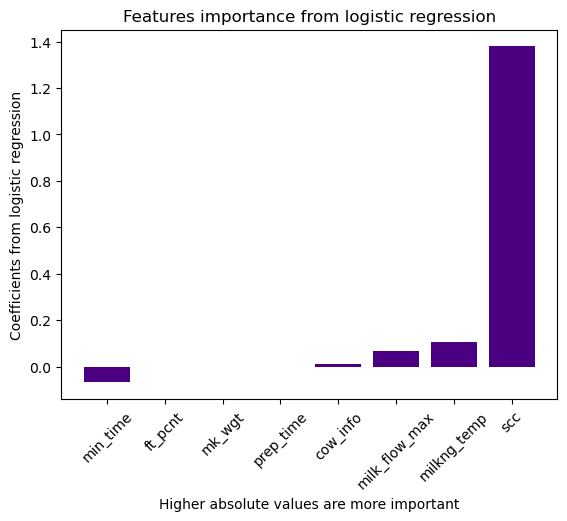

sp, se, auc:  0.8673976608187135 0.659942363112392 0.7636700119655527

==================== tree ====================

The best parameters:  {'tree_clf__max_depth': 7, 'tree_clf__min_samples_leaf': 20}
Get the results from cv and plot


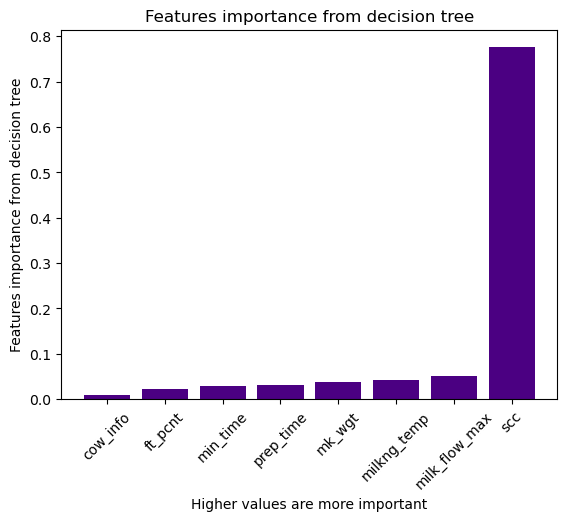

sp, se, auc:  0.8097953216374268 0.6729106628242075 0.7413529922308172

==================== MLP ====================

The best parameters:  {'mlp_clf__alpha': 0.5, 'mlp_clf__hidden_layer_sizes': (100, 100)}
sp, se, auc:  0.8054093567251462 0.7161383285302594 0.7607738426277028

---------------------------------------- mean_var ----------------------------------------

Number of 0 and ratio:  41513 0.9530948663789145
Number of 1 and ratio:  2043 0.0469051336210855
Shape of X: (instances, days, variables)
X, y:  (43556, 7, 8) (43556,)
X_train, X_test, y_train, y_test:  (29182, 7, 8) (14374, 7, 8) (29182,) (14374,)
X_train, X_test standized
X_train_squeezed, X_test_squeezed:  (29182, 8) (14374, 8)
After upsample: X_train_up, y_train_up (55666, 8) (55666,)

==================== Logistic ====================

The best parameters:  {'log_clf__C': 0.001, 'log_clf__l1_ratio': 1}
Get the results from cv and plot


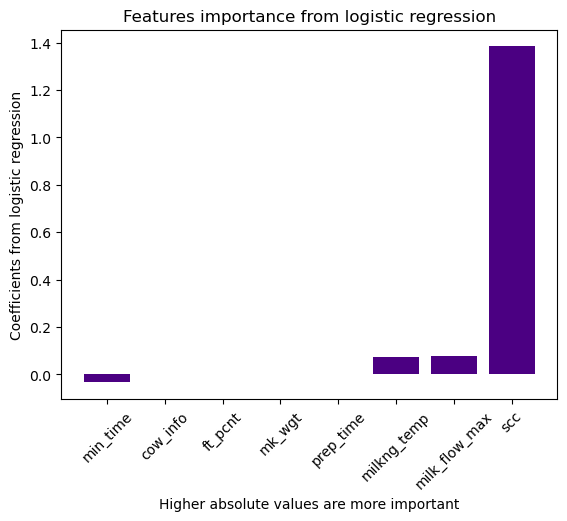

sp, se, auc:  0.8836257309941521 0.6368876080691642 0.7602566695316582

==================== tree ====================

The best parameters:  {'tree_clf__max_depth': 7, 'tree_clf__min_samples_leaf': 20}
Get the results from cv and plot


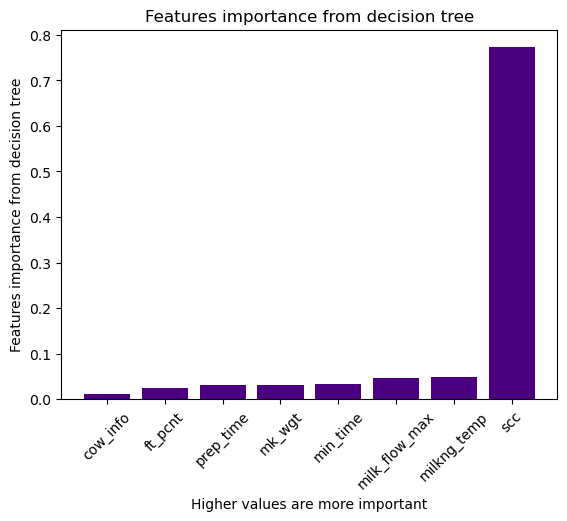

sp, se, auc:  0.810891812865497 0.6858789625360231 0.7483853877007601

==================== MLP ====================

The best parameters:  {'mlp_clf__alpha': 0.5, 'mlp_clf__hidden_layer_sizes': (100, 100)}
sp, se, auc:  0.8201754385964912 0.7132564841498559 0.7667159613731735

---------------------------------------- mean_slope ----------------------------------------

Number of 0 and ratio:  41513 0.9530948663789145
Number of 1 and ratio:  2043 0.0469051336210855
Shape of X: (instances, days, variables)
X, y:  (43556, 7, 8) (43556,)
X_train, X_test, y_train, y_test:  (29182, 7, 8) (14374, 7, 8) (29182,) (14374,)
X_train, X_test standized
X_train_squeezed, X_test_squeezed:  (29182, 8) (14374, 8)
After upsample: X_train_up, y_train_up (55666, 8) (55666,)

==================== Logistic ====================

The best parameters:  {'log_clf__C': 0.001, 'log_clf__l1_ratio': 1}
Get the results from cv and plot


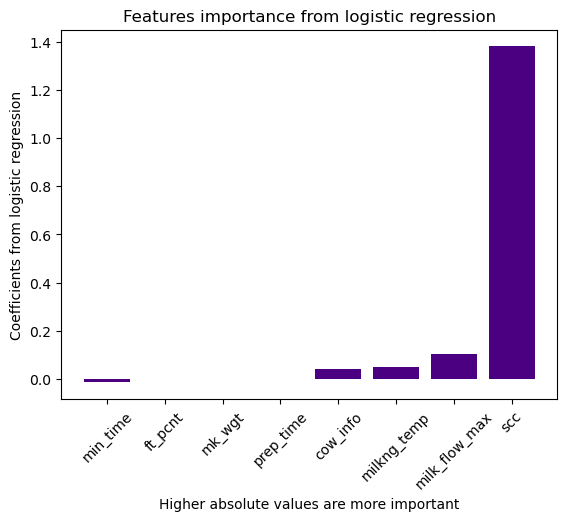

sp, se, auc:  0.9032894736842105 0.5979827089337176 0.750636091308964

==================== tree ====================

The best parameters:  {'tree_clf__max_depth': 7, 'tree_clf__min_samples_leaf': 20}
Get the results from cv and plot


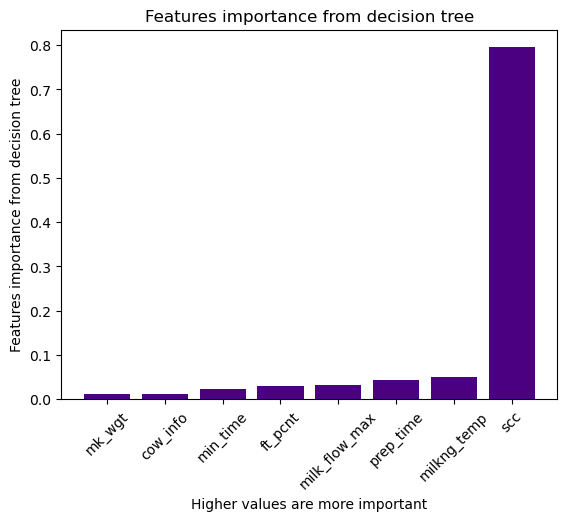

sp, se, auc:  0.8209795321637426 0.6512968299711815 0.7361381810674622

==================== MLP ====================

The best parameters:  {'mlp_clf__alpha': 0.5, 'mlp_clf__hidden_layer_sizes': (100, 100)}
sp, se, auc:  0.8306286549707602 0.6988472622478387 0.7647379586092994

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 10 3 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


---------------------------------------- mean ----------------------------------------

Number of 0 and ratio:  39445 0.9515825533146772
Number of 1 and ratio:  2007 0.04841744668532278
Shape of X: (instances, days, variables)
X, y:  (41452, 7, 8) (41452,)
X_train, X_test, y_train, y_test:  (27772, 7, 8) (13680, 7, 8) (27772,) (13680,)
X_train, X_test standized
X_train_squeezed, X_test_squeezed:  (27772, 8) (13680, 8)
After upsample: X_train_up, y_train_up (52866, 8) (52866,)

==================== Logistic ====================

The best parameters:  {'log_clf__C': 0.005, 'log_clf__l1_ratio': 1}
Get the results from cv and p

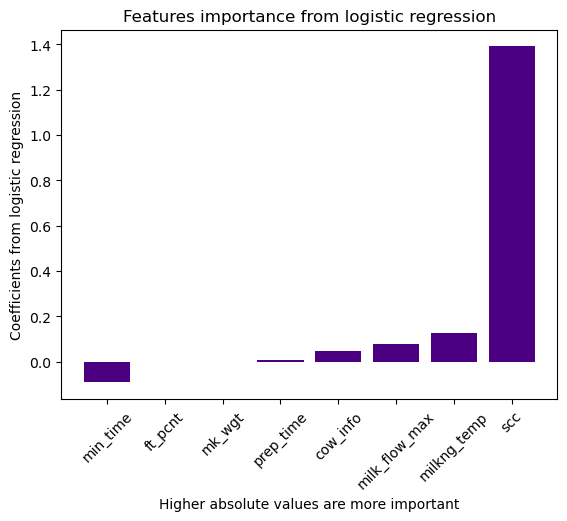

sp, se, auc:  0.8564402090378113 0.5793413173652695 0.7178907632015403

==================== tree ====================

The best parameters:  {'tree_clf__max_depth': 7, 'tree_clf__min_samples_leaf': 20}
Get the results from cv and plot


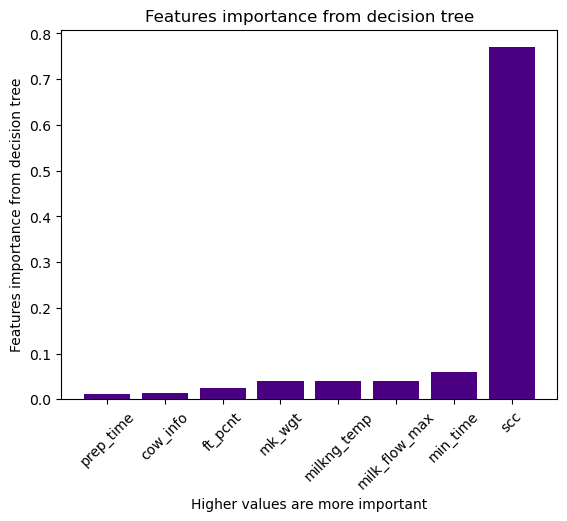

sp, se, auc:  0.8021057485398094 0.592814371257485 0.6974600598986471

==================== MLP ====================

The best parameters:  {'mlp_clf__alpha': 0.5, 'mlp_clf__hidden_layer_sizes': (100, 100)}
sp, se, auc:  0.7828927144174608 0.6452095808383234 0.714051147627892

---------------------------------------- mean_var ----------------------------------------

Number of 0 and ratio:  39445 0.9515825533146772
Number of 1 and ratio:  2007 0.04841744668532278
Shape of X: (instances, days, variables)
X, y:  (41452, 7, 8) (41452,)
X_train, X_test, y_train, y_test:  (27772, 7, 8) (13680, 7, 8) (27772,) (13680,)
X_train, X_test standized
X_train_squeezed, X_test_squeezed:  (27772, 8) (13680, 8)
After upsample: X_train_up, y_train_up (52866, 8) (52866,)

==================== Logistic ====================

The best parameters:  {'log_clf__C': 0.001, 'log_clf__l1_ratio': 0.8}
Get the results from cv and plot


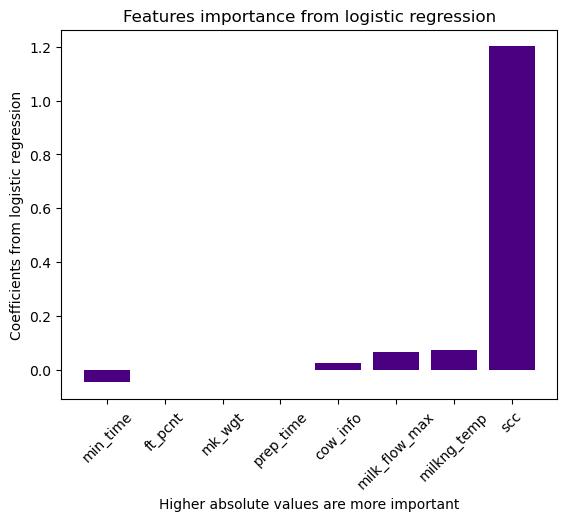

sp, se, auc:  0.8806486320319705 0.5538922155688623 0.7172704238004163

==================== tree ====================

The best parameters:  {'tree_clf__max_depth': 7, 'tree_clf__min_samples_leaf': 20}
Get the results from cv and plot


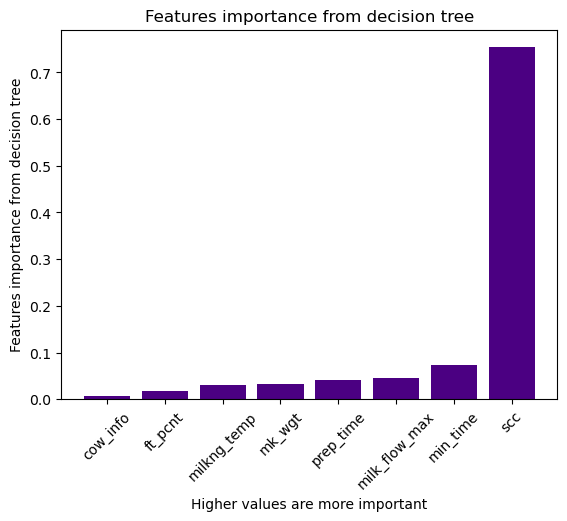

sp, se, auc:  0.8175530279741777 0.6152694610778443 0.716411244526011

==================== MLP ====================

The best parameters:  {'mlp_clf__alpha': 0.5, 'mlp_clf__hidden_layer_sizes': (100, 100)}
sp, se, auc:  0.8047187211804488 0.6287425149700598 0.7167306180752544

---------------------------------------- mean_slope ----------------------------------------

Number of 0 and ratio:  39445 0.9515825533146772
Number of 1 and ratio:  2007 0.04841744668532278
Shape of X: (instances, days, variables)
X, y:  (41452, 7, 8) (41452,)
X_train, X_test, y_train, y_test:  (27772, 7, 8) (13680, 7, 8) (27772,) (13680,)
X_train, X_test standized
X_train_squeezed, X_test_squeezed:  (27772, 8) (13680, 8)
After upsample: X_train_up, y_train_up (52866, 8) (52866,)

==================== Logistic ====================

The best parameters:  {'log_clf__C': 0.001, 'log_clf__l1_ratio': 1}
Get the results from cv and plot


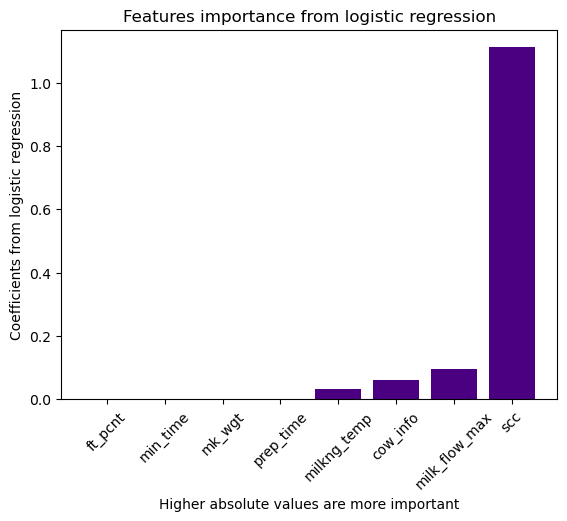

sp, se, auc:  0.8997079618813403 0.5299401197604791 0.7148240408209097

==================== tree ====================

The best parameters:  {'tree_clf__max_depth': 7, 'tree_clf__min_samples_leaf': 20}
Get the results from cv and plot


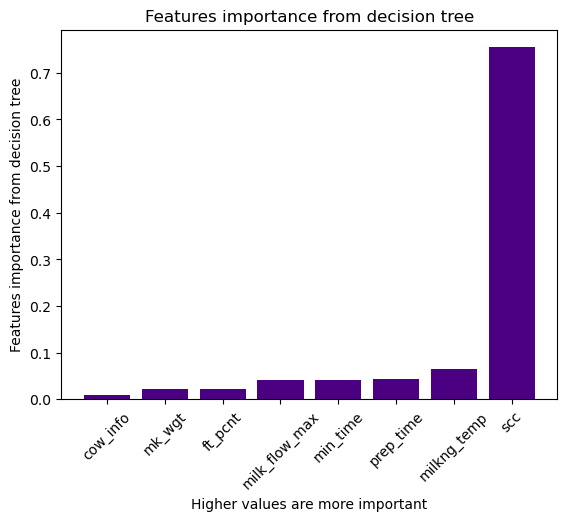

sp, se, auc:  0.8004918536735321 0.5703592814371258 0.685425567555329

==================== MLP ====================

The best parameters:  {'mlp_clf__alpha': 0.5, 'mlp_clf__hidden_layer_sizes': (100, 100)}
sp, se, auc:  0.8353827236397172 0.5973053892215568 0.716344056430637

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 13 5 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


---------------------------------------- mean ----------------------------------------

Number of 0 and ratio:  36128 0.9488391637777077
Number of 1 and ratio:  1948 0.051160836222292255
Shape of X: (instances, days, variables)
X, y:  (38076, 8, 8) (38076,)
X_train, X_test, y_train, y_test:  (25510, 8, 8) (12566, 8, 8) (25510,) (12566,)
X_train, X_test standized
X_train_squeezed, X_test_squeezed:  (25510, 8) (12566, 8)
After upsample: X_train_up, y_train_up (48376, 8) (48376,)

==================== Logistic ====================

The best parameters:  {'log_clf__C': 0.005, 'log_clf__l1_ratio': 0.8}
Get the results from cv and 

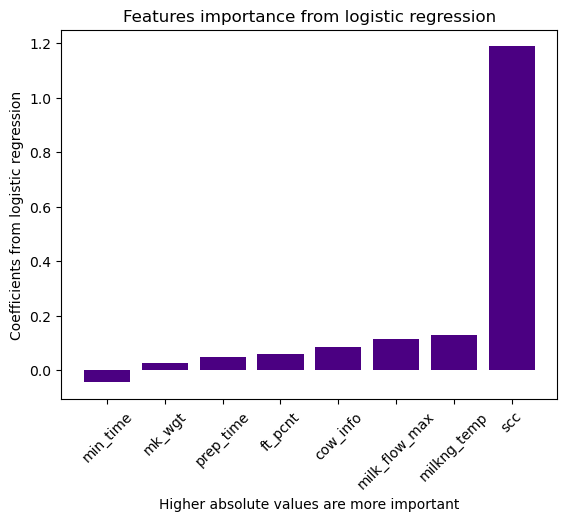

sp, se, auc:  0.8410385259631491 0.5782747603833865 0.7096566431732677

==================== tree ====================

The best parameters:  {'tree_clf__max_depth': 7, 'tree_clf__min_samples_leaf': 20}
Get the results from cv and plot


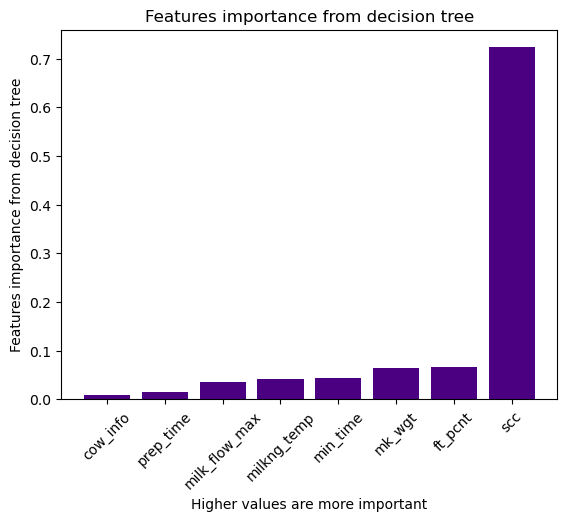

sp, se, auc:  0.8418760469011726 0.5303514376996805 0.6861137423004265

==================== MLP ====================

The best parameters:  {'mlp_clf__alpha': 0.5, 'mlp_clf__hidden_layer_sizes': (100, 100)}
sp, se, auc:  0.7552763819095477 0.6325878594249201 0.6939321206672339

---------------------------------------- mean_var ----------------------------------------

Number of 0 and ratio:  36128 0.9488391637777077
Number of 1 and ratio:  1948 0.051160836222292255
Shape of X: (instances, days, variables)
X, y:  (38076, 8, 8) (38076,)
X_train, X_test, y_train, y_test:  (25510, 8, 8) (12566, 8, 8) (25510,) (12566,)
X_train, X_test standized
X_train_squeezed, X_test_squeezed:  (25510, 8) (12566, 8)
After upsample: X_train_up, y_train_up (48376, 8) (48376,)

==================== Logistic ====================

The best parameters:  {'log_clf__C': 0.005, 'log_clf__l1_ratio': 0.8}
Get the results from cv and plot


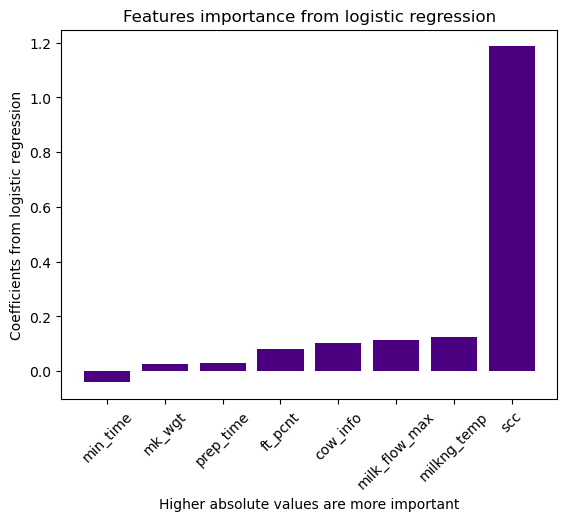

sp, se, auc:  0.857286432160804 0.5527156549520766 0.7050010435564403

==================== tree ====================

The best parameters:  {'tree_clf__max_depth': 7, 'tree_clf__min_samples_leaf': 20}
Get the results from cv and plot


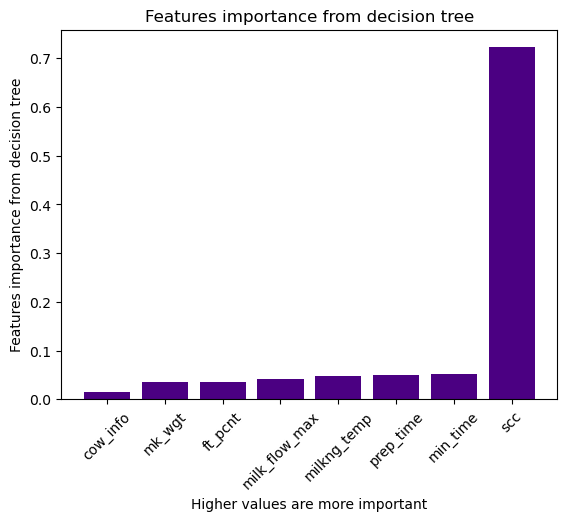

sp, se, auc:  0.81892797319933 0.5447284345047924 0.6818282038520611

==================== MLP ====================

The best parameters:  {'mlp_clf__alpha': 0.5, 'mlp_clf__hidden_layer_sizes': (100, 100)}
sp, se, auc:  0.8187604690117253 0.5862619808306709 0.7025112249211981

---------------------------------------- mean_slope ----------------------------------------

Number of 0 and ratio:  36128 0.9488391637777077
Number of 1 and ratio:  1948 0.051160836222292255
Shape of X: (instances, days, variables)
X, y:  (38076, 8, 8) (38076,)
X_train, X_test, y_train, y_test:  (25510, 8, 8) (12566, 8, 8) (25510,) (12566,)
X_train, X_test standized
X_train_squeezed, X_test_squeezed:  (25510, 8) (12566, 8)
After upsample: X_train_up, y_train_up (48376, 8) (48376,)

==================== Logistic ====================

The best parameters:  {'log_clf__C': 0.001, 'log_clf__l1_ratio': 1}
Get the results from cv and plot


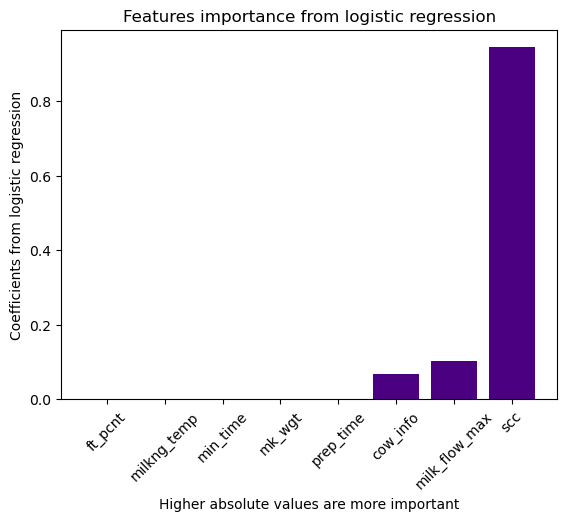

sp, se, auc:  0.8928810720268007 0.4968051118210863 0.6948430919239434

==================== tree ====================

The best parameters:  {'tree_clf__max_depth': 7, 'tree_clf__min_samples_leaf': 20}
Get the results from cv and plot


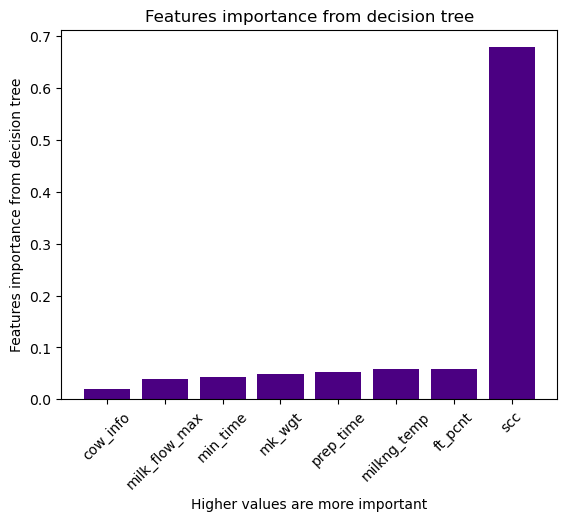

sp, se, auc:  0.7994137353433836 0.560702875399361 0.6800583053713722

==================== MLP ====================

The best parameters:  {'mlp_clf__alpha': 0.5, 'mlp_clf__hidden_layer_sizes': (100, 100)}
sp, se, auc:  0.7912897822445562 0.6054313099041534 0.6983605460743547
[[0.8673976608187135, 0.659942363112392, 0.7636700119655527], [0.8836257309941521, 0.6368876080691642, 0.7602566695316582], [0.9032894736842105, 0.5979827089337176, 0.750636091308964], [0.8564402090378113, 0.5793413173652695, 0.7178907632015403], [0.8806486320319705, 0.5538922155688623, 0.7172704238004163], [0.8997079618813403, 0.5299401197604791, 0.7148240408209097], [0.8410385259631491, 0.5782747603833865, 0.7096566431732677], [0.857286432160804, 0.5527156549520766, 0.7050010435564403], [0.8928810720268007, 0.4968051118210863, 0.6948430919239434]]

[[0.8097953216374268, 0.6729106628242075, 0.7413529922308172], [0.810891812865497, 0.6858789625360231, 0.7483853877007601], [0.8209795321637426, 0.6512968299711815, 

In [47]:
output_days_ls = [1, 3, 5]
period_ls = [8, 10, 13]
option_ls = ['mean', 'mean_var', 'mean_slope']

# init list to store result 
log_ls = [] 
tree_ls = []
mlp_ls = []

# outer loop for period
for i in range(len(period_ls)):
    period, output_days = period_ls[i], output_days_ls[i]
    print("\n>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>", period, output_days, ">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n")
    # inner loop for squeeze
    for option in option_ls: 
        print("\n----------------------------------------", option, "----------------------------------------\n")
        """using func: data_process_pipeline"""
        X_train, y_train, X_test, y_test = data_process_pipeline(df_detrend, output_days, period, threshold, predictors, option)
        """unsing func: logistic_final"""
        sp_log, se_log, auc_log = logistic_final(X_train, y_train, X_test, y_test, predictors)
        # append 
        log_ls.append([sp_log, se_log, auc_log])
        """using func: """
        sp_tree, se_tree, auc_tree = tree_final(X_train, y_train, X_test, y_test, predictors)
        # append 
        tree_ls.append([sp_tree, se_tree, auc_tree])
        """using func: """
        sp_mlp, se_mlp, auc_mlp = mlp_final(X_train, y_train, X_test, y_test, predictors)
        # append 
        mlp_ls.append([sp_mlp, se_mlp, auc_mlp])
        
print(log_ls)
print()
print(tree_ls)
print()
print(mlp_ls)

# Plot the results

In [1]:
import matplotlib.pyplot as plt
import numpy as np

log_ls = [[0.8673976608187135, 0.659942363112392, 0.7636700119655527], [0.8836257309941521, 0.6368876080691642, 0.7602566695316582], [0.9032894736842105, 0.5979827089337176, 0.750636091308964], [0.8564402090378113, 0.5793413173652695, 0.7178907632015403], [0.8806486320319705, 0.5538922155688623, 0.7172704238004163], [0.8997079618813403, 0.5299401197604791, 0.7148240408209097], [0.8410385259631491, 0.5782747603833865, 0.7096566431732677], [0.857286432160804, 0.5527156549520766, 0.7050010435564403], [0.8928810720268007, 0.4968051118210863, 0.6948430919239434]]
tree_ls = [[0.8097953216374268, 0.6729106628242075, 0.7413529922308172], [0.810891812865497, 0.6858789625360231, 0.7483853877007601], [0.8209795321637426, 0.6512968299711815, 0.7361381810674622], [0.8021057485398094, 0.592814371257485, 0.6974600598986471], [0.8175530279741777, 0.6152694610778443, 0.716411244526011], [0.8004918536735321, 0.5703592814371258, 0.685425567555329], [0.8418760469011726, 0.5303514376996805, 0.6861137423004265], [0.81892797319933, 0.5447284345047924, 0.6818282038520611], [0.7994137353433836, 0.560702875399361, 0.6800583053713722]]
mlp_ls = [[0.8054093567251462, 0.7161383285302594, 0.7607738426277028], [0.8201754385964912, 0.7132564841498559, 0.7667159613731735], [0.8306286549707602, 0.6988472622478387, 0.7647379586092994], [0.7828927144174608, 0.6452095808383234, 0.714051147627892], [0.8047187211804488, 0.6287425149700598, 0.7167306180752544], [0.8353827236397172, 0.5973053892215568, 0.716344056430637], [0.7552763819095477, 0.6325878594249201, 0.6939321206672339], [0.8187604690117253, 0.5862619808306709, 0.7025112249211981], [0.7912897822445562, 0.6054313099041534, 0.6983605460743547]]

In [4]:
""" 
func: 
    to write the label on plots 
args: 
    dates, temp: list of x and y in the plot 
    plt: the plot object
return: 
    annotated plot
"""
import matplotlib.pyplot as plt
import numpy as np
def write_label(dates, temp, plt): 
    for x, y in zip(dates, temp):
        label = y
        plt.annotate(label, (x, y),
                     xycoords="data",
                     textcoords="offset points",
                     xytext=(0, 10), ha="center")

In [17]:
""" 
func: 
    to plot for a model's result 
args: 
    log_ls: list[list[float]] the results of this model
    idx_model: 0, 1, 2 [int]
    path: str
return: 
    name_ls: list[str]
"""
def plot_one_model(log_ls, idx_model, path):
    
    # init models 
    models = ['LR', 'DT', 'MLP']
    char_idx = ['adg', 'beh', 'cfi']
    # init methods
    method_str = ['mean', 'mean plus std', 'mean plus slope']
    # init method id (0, 1, 2)
    idx_method_ls = [0, 1, 2]
    # total num of methods
    shrink_method = 3 
    # init name 
    name_ls = []

    # looping for idx_method 
    for idx_method in idx_method_ls: 

        # init list for SP, SE, AUC 
        SP, SE, AUC = [], [], [] 

        # loop the list 
        for i in range(idx_method, len(log_ls), shrink_method):
            # specificity
            sp = round(log_ls[i][0]*100, 2)
            SP.append(sp)
            # sensitifity
            se = round(log_ls[i][1]*100, 2)
            SE.append(se)
            # auc
            auc = round(log_ls[i][2]*100, 2)
            AUC.append(auc)   

        # reserse the list
        SP, SE, AUC = SP[::-1], SE[::-1], AUC[::-1]
        x_axis = ['5 days', '3 days', '1 days']

        plt.plot(x_axis, SP, label = 'specificity', color="indigo", marker = 'o')
        """using func: """
        write_label(x_axis, SP, plt)
        plt.plot(x_axis, SE, label = 'sensitivity', color="indigo", marker = 's')
        """using func: """
        write_label(x_axis, SE, plt)
        plt.plot(x_axis, AUC, label = 'AUC', color="forestgreen", marker = '^')
        """using func: """
        write_label(x_axis, AUC, plt)
        plt.legend() 
        plt.title(models[idx_model] + " with method: " + method_str[idx_method])
        plt.xlabel("(" + char_idx[idx_model][idx_method] + ")")
        
        # saving 
        name = models[idx_model] + "_" + method_str[idx_method]
        name_ls.append(name)
        plt.gcf().set_size_inches(5, 5)
        plt.savefig(path+name, dpi=200)
        plt.close()
        
    return name_ls

In [18]:
"""using func: plot_one_model"""
name_ls_log = plot_one_model(log_ls, 0, 'plot/Results_classificaiton/')
"""using func: plot_one_model"""
name_ls_tree = plot_one_model(tree_ls, 1, 'plot/Results_classificaiton/')
"""using func: plot_one_model"""
name_ls_mlp = plot_one_model(mlp_ls, 2, 'plot/Results_classificaiton/')

In [19]:
""" 
func: 
    concate plots 
args: 
    name_ls_log, name_ls_tree, name_ls_mlp: list[str]
return: 
    a plot
"""
def concat_plots(name_ls_log, name_ls_tree, name_ls_mlp, path):
    
    # init name for row 
    row_ls = ['row_1', 'row_2', 'row_3']
    # for looping 
    temp = [name_ls_log, name_ls_tree, name_ls_mlp]
    for i in range(len(temp)):
        # concat one model at one row 
        figa = plt.imread(path + temp[i][0] + '.png')
        figb = plt.imread(path + temp[i][1] + '.png')
        figc = plt.imread(path + temp[i][2] + '.png')
        figd = np.concatenate((figa,figb), axis=0)
        fige = np.concatenate((figd,figc), axis=0)
        row_ls[i] = fige
        
    # concat to columns 
    figf = np.concatenate((row_ls[0], row_ls[1]), axis=1)
    figg = np.concatenate((figf, row_ls[2]), axis=1)    
                   
    fname = path + "final_classification" + ".png"
    plt.imsave(fname, figg)

In [20]:
concat_plots(name_ls_log, name_ls_tree, name_ls_mlp, 'plot/Results_classificaiton/')